In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def ipeco_preprocessing():
    
    data = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20IPECO.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
    data.columns = ['ipeco', 'coyuntura', 'expectativas', 'sea', 'da', 'sef', 'df', 'iif', 'ipecotm']
    data = data.drop(['coyuntura', 'expectativas', 'ipecotm'], axis=1)

    data['ipeco'] = data['ipeco']*0.564465028
    data['sea'] = data['sea']*0.503225806
    data['da'] = data['da']*0.241887388
    data['sef'] = data['sef']*0.778145695
    data['df'] = data['df']*0.502857143
    data['iif'] = data['iif']*0.78490566

    return data

In [3]:
ipeco = ipeco_preprocessing()

In [4]:
ipec = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/GFK%20ADIMARK%20IPEC.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
ipec.columns = ['sepa', 'sena', 'senf12m', 'senf5y', 'ecah', 'ipec']
ipec = ipec[['ipec', 'sepa', 'sena', 'senf12m', 'senf5y', 'ecah']]

In [5]:
data = pd.concat([ipeco, ipec], axis=1)

In [6]:
data = data.interpolate(method='linear', limit_area='inside')

In [7]:
indices = data[['ipeco', 'ipec']]

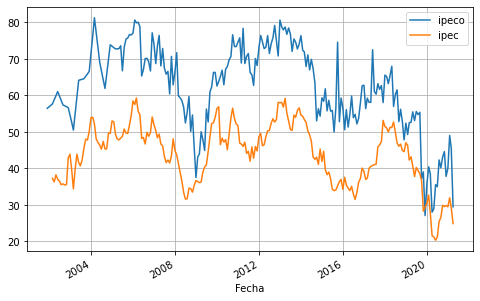

In [10]:
indices.plot(linewidth=1.5, figsize=(8,5))
plt.grid()

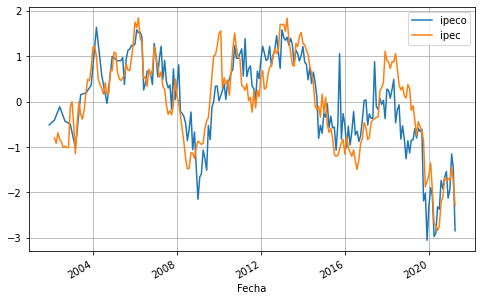

In [11]:
zindices = (indices - indices.mean()) / indices.std()
zindices.plot(linewidth=1.5, figsize=(8,5))
plt.grid()

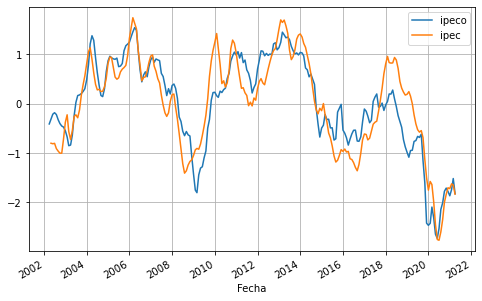

In [12]:
zindices3 = zindices.rolling(3).mean()
zindices3.plot(linewidth=1.5, figsize=(8,5))
plt.grid()

In [13]:
corr_mat = data.corr().loc[['ipeco', 'sea', 'da', 'sef', 'df', 'iif']][['ipec', 'sepa', 'sena', 'senf12m', 'senf5y', 'ecah']]
corr_mat

,ipec,sepa,sena,senf12m,senf5y,ecah
ipeco,0.841321,0.761821,0.809062,0.739334,0.704364,0.864410
sea,0.793337,0.758369,0.780078,0.641621,0.595136,0.822836
da,0.700541,0.667762,0.690940,0.546360,0.489840,0.763524
sef,0.694880,0.583160,0.670102,0.672453,0.653441,0.687024
df,0.775869,0.693544,0.714153,0.762929,0.722090,0.738939
iif,0.609932,0.512346,0.574127,0.556342,0.582667,0.640510


<AxesSubplot:>

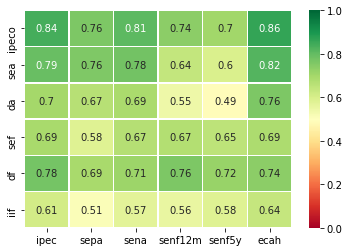

In [14]:
fig, ax =plt.subplots()
sns.heatmap(corr_mat, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=0, vmax=1)

In [18]:
(np.array([0, 100])/ 0.564465028).round()

array([  0., 177.])

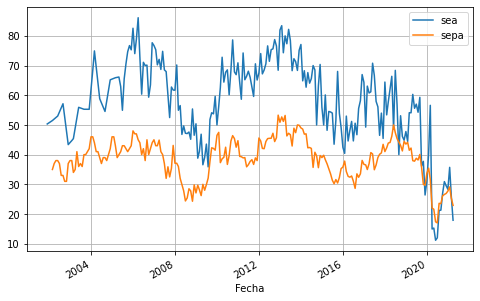

In [20]:
data[['sea', 'sepa']].plot(linewidth=1.5, figsize=(8,5))
plt.grid()

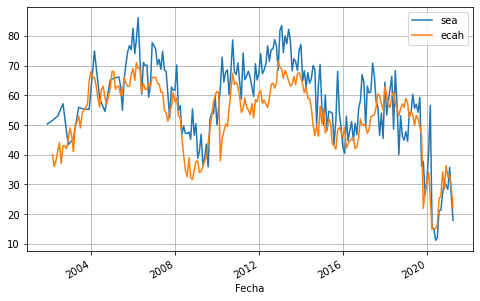

In [21]:
data[['sea', 'ecah']].plot(linewidth=1.5, figsize=(8,5))
plt.grid()

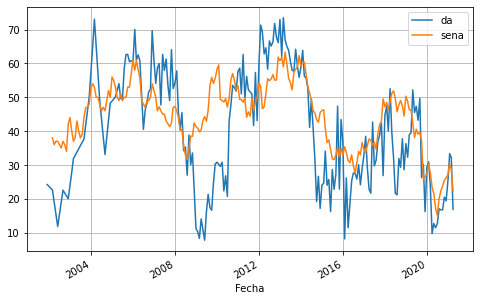

In [22]:
data[['da', 'sena']].plot(linewidth=1.5, figsize=(8,5))
plt.grid()

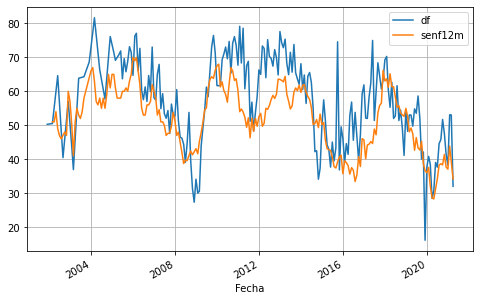

In [23]:
data[['df', 'senf12m']].plot(linewidth=1.5, figsize=(8,5))
plt.grid()